In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
docentes_path = './data/Docentes.csv'
docentes_df = pd.read_csv(docentes_path, encoding='utf-8', delimiter=';')
docentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3225 entries, 0 to 3224
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   APELLIDOS Y NOMBRES   3225 non-null   object
 1   CÓDIGO DOCENTE        3225 non-null   object
 2   FACULTAD              3225 non-null   object
 3   TIPO DOC.             3225 non-null   object
 4   DOC. IDENTIDAD        3225 non-null   int64 
 5   CORREO INSTITUCIONAL  3225 non-null   object
 6   GRADO ACADÉMICO       3225 non-null   object
 7   CATEGORÍA             3225 non-null   object
dtypes: int64(1), object(7)
memory usage: 201.7+ KB


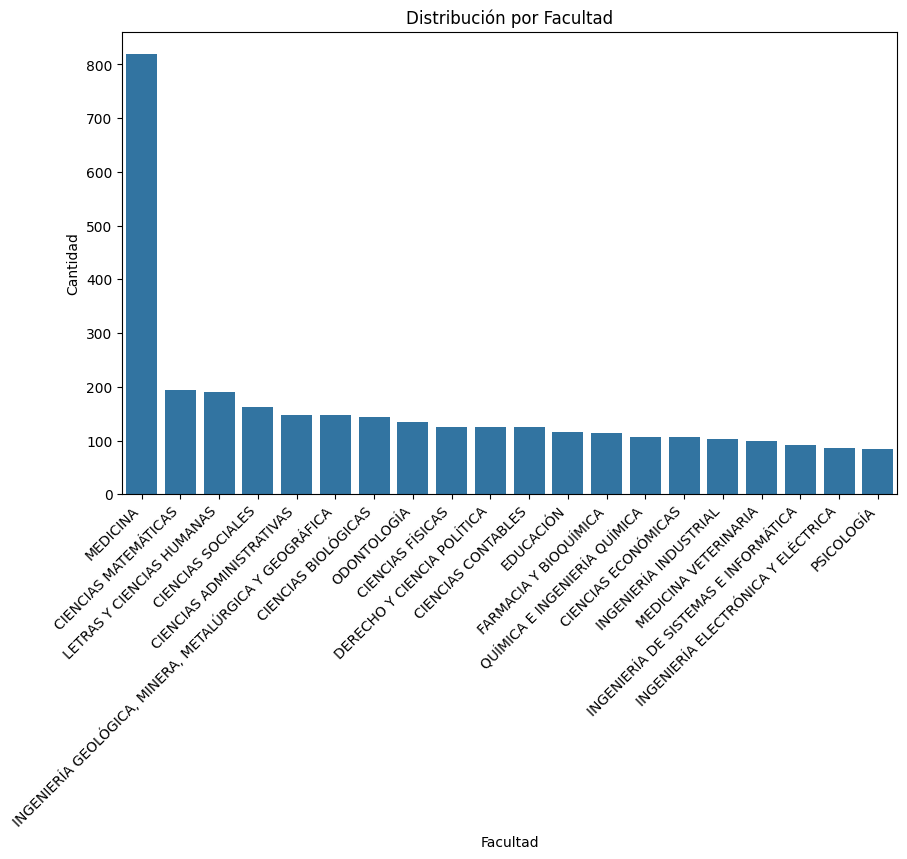

In [3]:
# 1. Visualización básica de datos
def visualizar_datos(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='FACULTAD', order=df['FACULTAD'].value_counts().index)
    plt.title('Distribución por Facultad')
    plt.xlabel('Facultad')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45, ha='right')
    plt.show()

visualizar_datos(docentes_df)

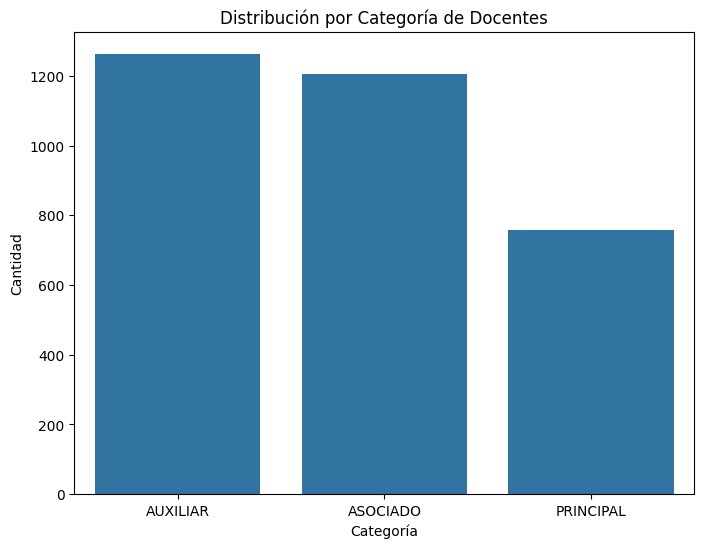

In [4]:
def visualizar_categorias(df):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='CATEGORÍA', order=df['CATEGORÍA'].value_counts().index)
    plt.title('Distribución por Categoría de Docentes')
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad')
    plt.show()

visualizar_categorias(docentes_df)

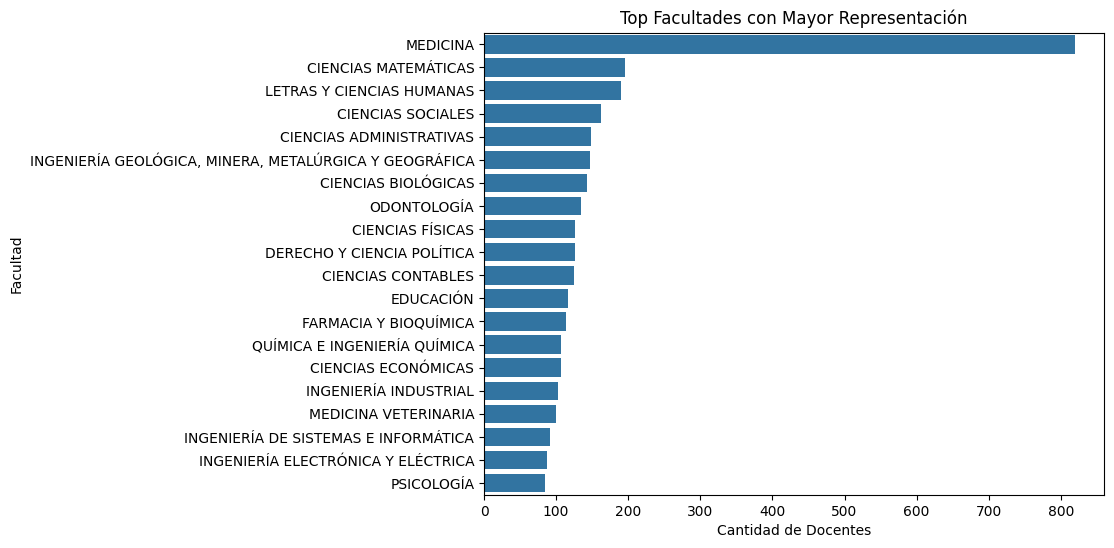

In [5]:
def top_facultades(df):
    facultades = df['FACULTAD'].value_counts().reset_index()
    facultades.columns = ['Facultad', 'Cantidad']
    plt.figure(figsize=(8, 6))
    sns.barplot(data=facultades, x='Cantidad', y='Facultad')
    plt.title('Top Facultades con Mayor Representación')
    plt.xlabel('Cantidad de Docentes')
    plt.ylabel('Facultad')
    plt.show()

top_facultades(docentes_df)

In [6]:
docentes_df

,APELLIDOS Y NOMBRES,CÓDIGO DOCENTE,FACULTAD,TIPO DOC.,DOC. IDENTIDAD,CORREO INSTITUCIONAL,GRADO ACADÉMICO,CATEGORÍA
0,ACOSTA EVANGELISTA ZULLY LUZ,00037A,MEDICINA,DNI,8199506,zacostae@unmsm.edu.pe,DOCTORADO,PRINCIPAL
1,ALARCON VILLAVERDE JORGE ODON,001201,MEDICINA,DNI,7215467,jalarconv@unmsm.edu.pe,DOCTORADO,PRINCIPAL
2,ALVARADO RIVADENEYRA SILAS HILDELIZA,002615,MEDICINA,DNI,8707064,salvarador@unmsm.edu.pe,MAESTRIA,PRINCIPAL
3,ANGULO SOLIMANO JUAN MANUEL,003654,MEDICINA,DNI,8267785,jangulos@unmsm.edu.pe,DOCTORADO,PRINCIPAL
4,APARICIO PONCE JORGE RENATO,0A1490,MEDICINA,DNI,7837682,japariciop@unmsm.edu.pe,DOCTORADO,PRINCIPAL
...,...,...,...,...,...,...,...,...
3220,SALINAS AZAÑA GILBERTO ANIBAL,089575,INGENIERÍA DE SISTEMAS E INFORMÁTICA,DNI,8105290,gsalinasa@unmsm.edu.pe,TITULO UNIVERSITARIO,AUXILIAR
3221,SOBERO RODRIGUEZ FANY YEXENIA,0A0716,INGENIERÍA DE SISTEMAS E INFORMÁTICA,DNI,20120467,fsoberor@unmsm.edu.pe,TITULO UNIVERSITARIO,AUXILIAR
3222,TAPIA CARBAJAL JUAN RICARDO,0A9179,INGENIERÍA DE SISTEMAS E INFORMÁTICA,DNI,9454245,jtapiaca@unmsm.edu.pe,MAESTRIA,AUXILIAR
3223,UGAZ CACHAY WINSTON IGNACIO,0A1981,INGENIERÍA DE SISTEMAS E INFORMÁTICA,DNI,40555355,wugazc@unmsm.edu.pe,TITULO UNIVERSITARIO,AUXILIAR


In [7]:
# Codificación de datos categóricos
le_facultad = LabelEncoder()
le_grado = LabelEncoder()
le_categoria = LabelEncoder()

docentes_df['FACULTAD'] = le_facultad.fit_transform(docentes_df['FACULTAD'])
docentes_df['GRADO ACADÉMICO'] = le_grado.fit_transform(docentes_df['GRADO ACADÉMICO'])
docentes_df['CATEGORÍA'] = le_categoria.fit_transform(docentes_df['CATEGORÍA'])

In [8]:
# Separar características (X) y etiqueta (y)
X = docentes_df[['FACULTAD', 'GRADO ACADÉMICO']]
y = docentes_df['CATEGORÍA']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamiento de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelos a entrenar
modelos = {
    "Regresión Logística": LogisticRegression(random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Bosque Aleatorio": RandomForestClassifier(random_state=42),
    "Máquina de Soporte Vectorial (SVM)": SVC(random_state=42)
}

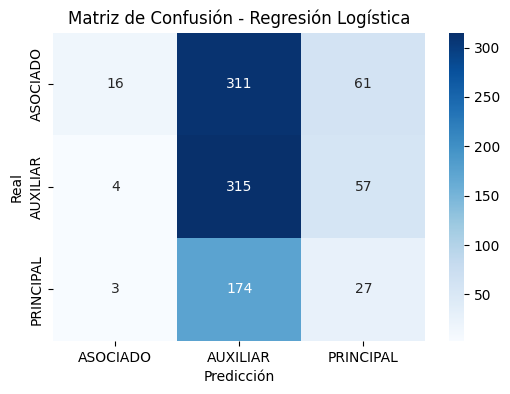

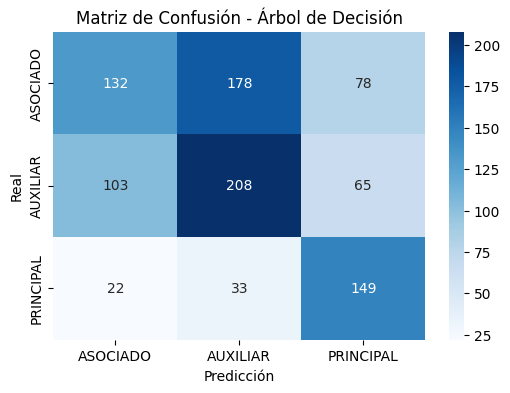

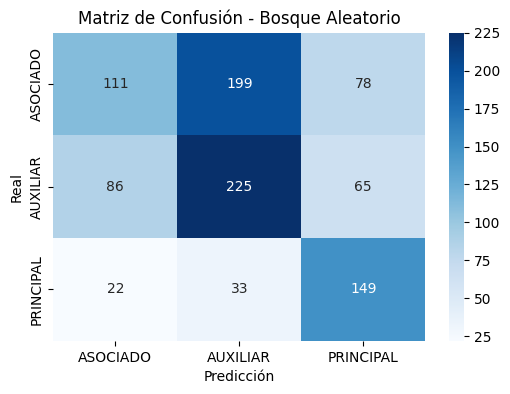

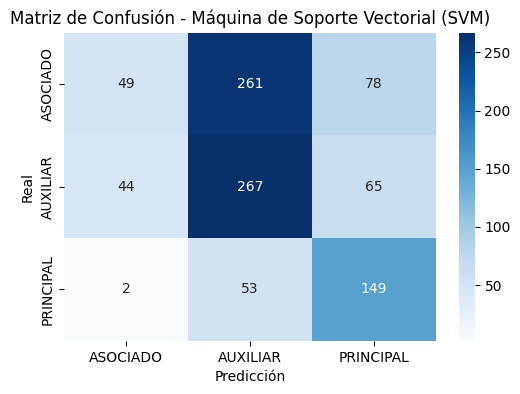

In [9]:
# Entrenar y evaluar modelos con métricas adicionales
resultados_docentes = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Guardar resultados
    resultados_docentes[nombre] = {
        "Exactitud (Accuracy)": accuracy,
        "Precisión": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Reporte de Clasificación": classification_report(y_test, y_pred, output_dict=True),
        "Matriz de Confusión": confusion_matrix(y_test, y_pred)
    }

# Crear un DataFrame con las métricas de rendimiento
metricas_docentes_df = pd.DataFrame({
    nombre: {
        "Exactitud (Accuracy)": datos["Exactitud (Accuracy)"],
        "Precisión": datos["Precisión"],
        "Recall": datos["Recall"],
        "F1-Score": datos["F1-Score"]
    }
    for nombre, datos in resultados_docentes.items()
}).T

# Visualizar las matrices de confusión
for nombre, datos in resultados_docentes.items():
    matriz = datos["Matriz de Confusión"]
    plt.figure(figsize=(6, 4))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', 
                xticklabels=le_categoria.classes_, 
                yticklabels=le_categoria.classes_)
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

In [10]:
metricas_docentes_df

,Exactitud (Accuracy),Precisión,Recall,F1-Score
Regresión Logística,0.369835,0.471022,0.369835,0.271903
Árbol de Decisión,0.505165,0.506233,0.505165,0.493929
Bosque Aleatorio,0.501033,0.501936,0.501033,0.483048
Máquina de Soporte Vectorial (SVM),0.480372,0.492783,0.480372,0.424685
